## 1. Research

### 1.1 Background

The agricultural sector forms a cornerstone of Ireland's economy and rural culture. Research shows that farming in Ireland is one of the most stressful occupations (Bennett, 2016) and is considered one of the top ten most stressful jobs in the world (Ang, 2010; Wallis & Dollard, 2008). There is a growing awareness of the psychological and physiological risks associated with farming; these include increased rates of anxiety and depression, stress levels, and suicide (Loughrey & Hennessy, 2016; McConaghy, 2016; Leonard, 2015). According to the Centres for Disease Control and Prevention ([CDC] 2016) farming has the highest number of suicides compared to any other work sector (84.5 per 100,000). These statistics highlight the dangers and difficulties associated with farming throughout Ireland. This has prompted a field of research around the possible causes of increased accidents and workplace fatalities.

#### 1.2 Dairy Farming
Although there are many categories of farming, research shows that dairy farming is massively overrepresented when it comes to workplace accidents and fatalities. Dairy farmers show disproportionately high fatality and accident rates when compared to other farming sectors; research from McNamara (2010) found that dairy farmers make up 58% of farming fatalities, despite dairy farms only constituting 11.2% of the farms in Ireland. One explanation for this over representation of accidents and fatalities might stem from the excess stressors that dairy farmers are exposed too which results in burnout (Leshed, Håkansson & Kaye, 2014).

## 2. Choosing Data Variables

### 2.1 Burnout
Burnout is a psychological syndrome emerging as a prolonged response to chronic interpersonal stressors on the job (Maslach, Schaufeli, & Leiter, 2001). It's particularly relevant in occupations like farming, which involves high-stress environments and unpredictable workloads (O'Connor et al., 2024).

In a 2024 study by O'Connor et al. investigating burnout among Irish farmers, a single-item, 5-point burnout scale was used for self-assessment. Participants rated their burnout level from 1 ('I enjoy my work') to 5 ('I feel completely burned out'), with scores of 3 or higher indicating burnout. The study found that 23.6% of participants experienced burnout, with a higher median age observed in the burnt-out group (Mdn = 37) compared to those not burnt out (Mdn = 32). Other variables includes within this study that furthered my research includes sleep quality, age, and hectares owned.

### 2.2 Sleep Quality

Sleep quality is closely related to burnout, as poor sleep can exacerbate the effects of stress and vice versa (Åkerstedt, Kecklund, & Axelsson, 2007). In farming, where work can be physically demanding, sleep becomes crucial for recovery (Scott, Aronson, & Delgado, 2007). The relationship between sleep quality and burnout has been extensively documented in various occupational settings (Söderström, Jeding, Ekstedt, Perski, & Åkerstedt, 2012)

### 2.3 Age

Age has been found to be a significant factor in the experience of burnout. Different life stages and career phases can influence stress perception and coping mechanisms (Zis, Artemiadis, Bargiotas, Nteveros, & Hadjigeorgiou, 2014). In agriculture, age might reflect different farming practices and attitudes towards work, influencing stress levels (O'Connor et al., 2024).


### 2.4 Hectares Owned
The size of the land owned (hectares) can be an indicator of the scale and type of farming operations, which can have varying levels of demands and stress (Sundquist, Johansson, DeMarinis, Johansson, & Sundquist, 2013). Larger farms might involve more complex management tasks and financial responsibilities, potentially affecting stress levels and burnout rates.


## 3. Data Preparation

### 3.1 Import Libaries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### 3.2 Synthesizing the dataset

#### 3.2.1 Defining variables

##### Number of entries
Setting number of entires for the dataset. 

In [2]:
#Max entries I could find for research in Dairy Farmers in Ireland was 121.
#I picked 250 for my data as it is double the amount

num_farmers = 200

##### Burnout

Although burnout measure on 5 point scale, research showed >=3 is burnout so I created binary variables (1=burnout, 0=no burnot)

From research above probability of burnout set to 23.6%


In [3]:
burnout_data = np.random.choice([1, 0], size=num_farmers, p=[0.236, 0.764])

##### Sleep Quality

Similar to burnout, binary variables created based on findings. Sleep quality is assigned as 'Poor' or 'Good' with a 50.1% chance of being poor (from research above)

In [4]:
sleep_quality_data = np.random.choice(['Poor', 'Good'], size=num_farmers, p=[0.501, 0.499])

##### Hectares Owned

Categorical variable based on research above.

The probability of each category is set according to the distribution provided in the study

In [5]:
hectares_data = np.random.choice(['<50', '51-70', '71-90', '91-120', '>120'], size=num_farmers, p=[0.018, 0.077, 0.077, 0.215, 0.613])

##### Age

Age is generated as a continuous variable, assuming a normal distribution with a mean of 50 and a standard deviation of 10

The '.clip(min=18, max=80)' function ensures that ages stay within a realistic range (18 to 80 years)

In [6]:
mean_age = 50
std_dev_age = 10
age_data = np.random.normal(mean_age, std_dev_age, num_farmers).clip(min=18, max=80)

#### 3.2.2 Creating DataFrame

In [7]:
df = pd.DataFrame({
    'age': age_data,
    'burnout': burnout_data,
    'sleep_quality': sleep_quality_data,
    'hectares_owned': hectares_data,
})

In [8]:
df

,age,burnout,sleep_quality,hectares_owned
0,53.065471,0,Good,51-70
1,43.452261,0,Good,>120
2,65.893302,1,Good,>120
3,60.689238,0,Poor,91-120
4,50.918839,0,Good,>120
...,...,...,...,...
195,55.790435,0,Poor,51-70
196,67.655862,1,Poor,>120
197,52.875727,0,Poor,>120
198,42.120453,0,Poor,>120


#### Descriptive Statistics

Summary of descriptive statistics based on output below:

The descriptive statistics of the dataset, encompassing 200 individuals, reveal a mean age of 50 years with a moderate age range. Approximately 22% of the sample is experiencing burnout, while over half report good sleep quality. The majority of 'farmers' own more than 120 hectares of land, highlighting a sample with substantial landholdings.

In [9]:
descriptive_stats = df.describe(include='all')
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
                age     burnout sleep_quality hectares_owned
count   200.000000  200.000000           200            200
unique         NaN         NaN             2              5
top            NaN         NaN          Good           >120
freq           NaN         NaN           104            132
mean     50.232067    0.220000           NaN            NaN
std       9.029555    0.415286           NaN            NaN
min      26.197367    0.000000           NaN            NaN
25%      43.437502    0.000000           NaN            NaN
50%      50.019477    0.000000           NaN            NaN
75%      56.021580    0.000000           NaN            NaN
max      75.211783    1.000000           NaN            NaN


#### Plot Distribution

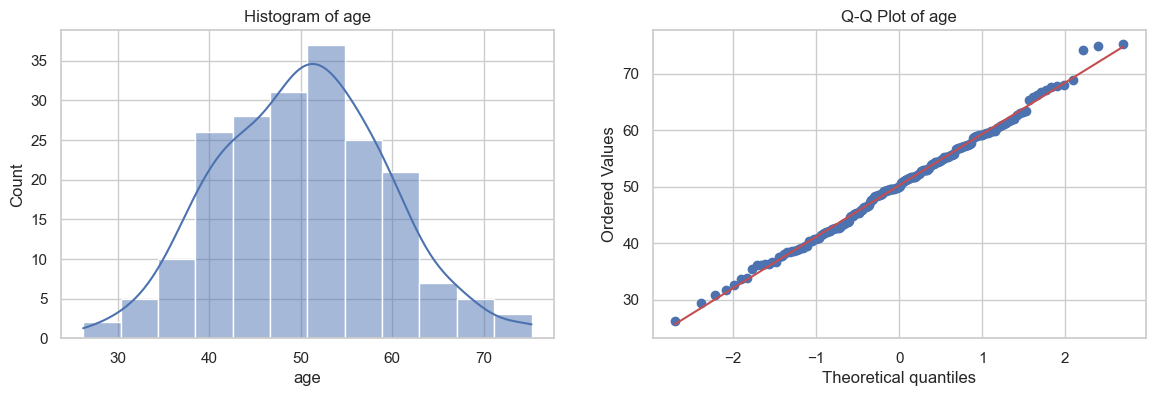

In [10]:
def plot_distribution(data, title):
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    sns.histplot(data, kde=True, ax=ax[0])
    ax[0].set_title(f'Histogram of {title}')
    stats.probplot(data, dist="norm", plot=ax[1])
    ax[1].set_title(f'Q-Q Plot of {title}')
    plt.show()
    
plot_distribution(df['age'], 'age')

#### Performing Shapiro-Wilk Test for Age

In [11]:
# Test for normal distribution; results show it is close to normal distribution
shapiro_test = stats.shapiro(df['age'])
print(f"Shapiro-Wilk Test Results for Age:\nStatistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

Shapiro-Wilk Test Results for Age:
Statistic: 0.9955471754074097, p-value: 0.8266767859458923


## 4. Analysis

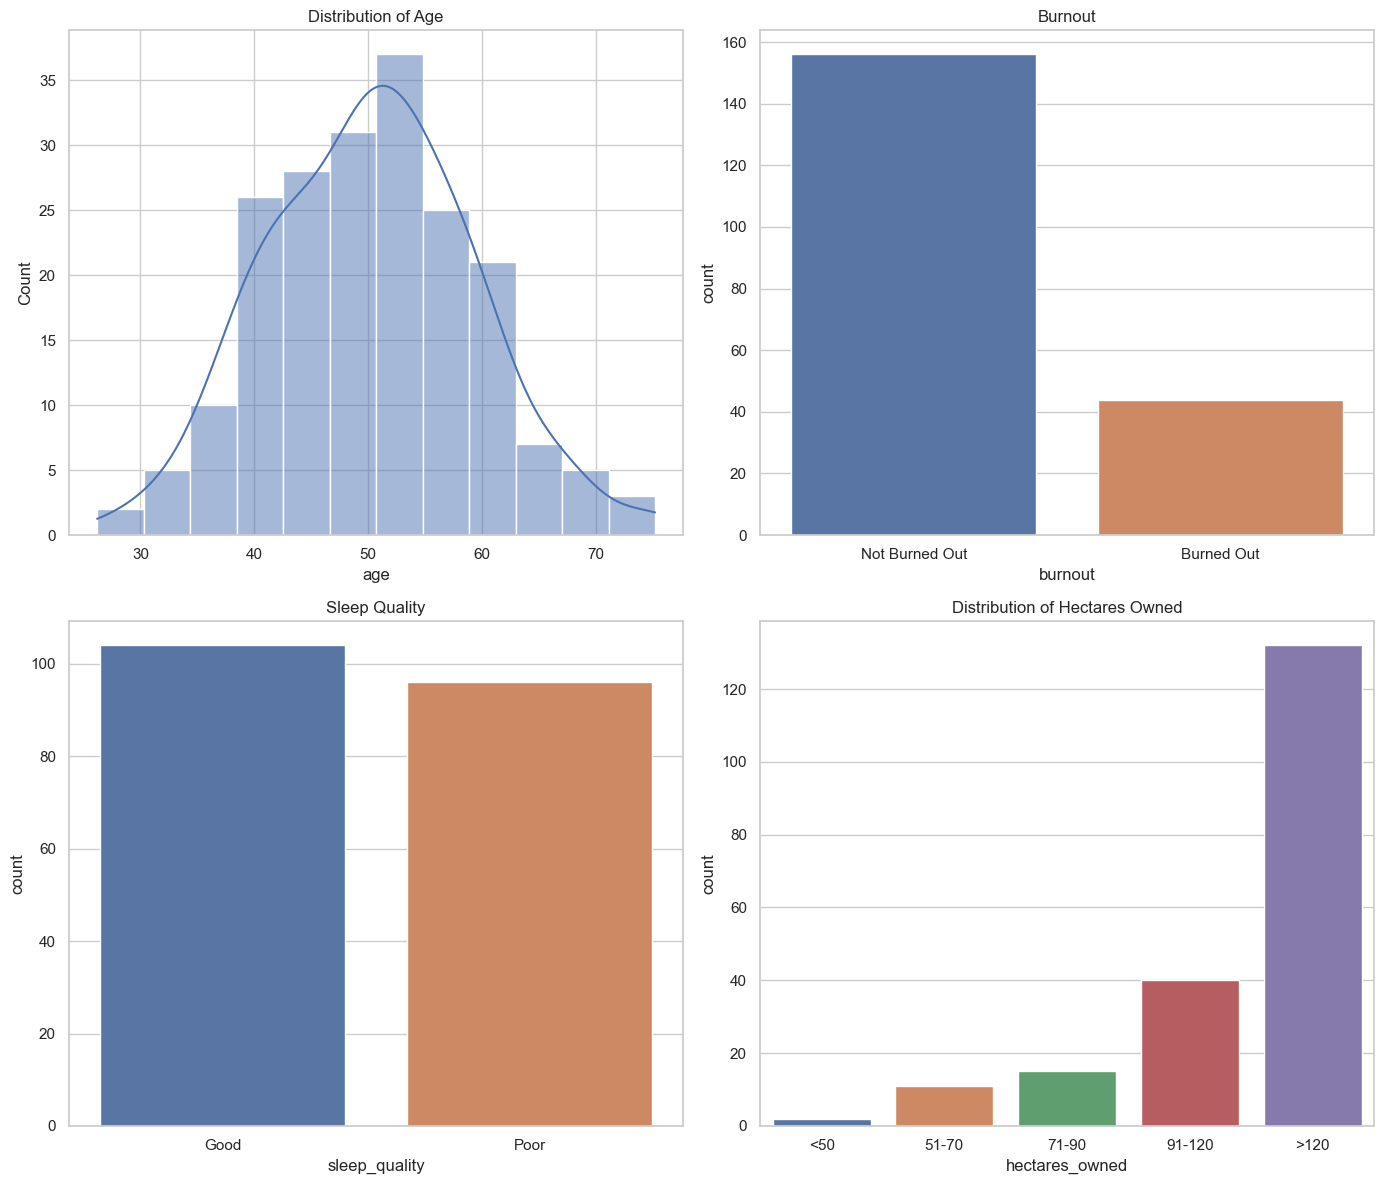

In [12]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Histogram (Age)
sns.histplot(df['age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')

# Bar Chart (Burnout)
sns.countplot(x='burnout', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Burnout')
axes[0, 1].set_xticklabels(['Not Burned Out', 'Burned Out'])

# Bar Chart (Sleep Quality)
sns.countplot(x='sleep_quality', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Sleep Quality')

# Count of Hectares Owned
sns.countplot(x='hectares_owned', data=df, order=['<50', '51-70', '71-90', '91-120', '>120'], ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Hectares Owned')

plt.tight_layout()
plt.show()

## 5. References

Alpass, F., Flett, R., Humphries, S., Massey, C., Morriss, S., & Long, N. (2004). Stress in Dairy Farming and the Adoption of New Technology. International Journal Of Stress Management, 11(3), 270-281. http://dx.doi.org/10.1037/1072-5245.11.3.270

Ang, H. (2010). Occupational stress among the New Zealand farmers: A review. Labour, Employment And Work In New Zealand.

Åkerstedt, T., Kecklund, G., & Axelsson, J. (2007). Impaired sleep after bedtime stress and worries. Biological Psychology, 76(3), 170-173.

Bakker, A., & Demerouti, E. (2007). The Job Demands‐Resources model: state of the art. Journal Of Managerial Psychology, 22(3), 309-328. http://dx.doi.org/10.1108/02683940710733115

Bennett, K. (2016). An Exploratory Study of the effects of Stress and Fatigue on Irish Farm Safety (Higher Diploma). DBS School.

CDC. (2016). Morbidity and Mortality Weekly Report. Centres for Disease Control and Prevention. Retrieved from https://www.cdc.gov/mmwr/volumes/56/wr/pdfs/mm2016.pdf

Leonard, J. (2015). Stress Management in Farming in Ireland. Nuffield Ireland.

Loughrey, J., & Hennessy, T. (2016). Farm income variability and off-farm employment in Ireland. Agricultural Finance Review, 76(3), 378-401. http://dx.doi.org/10.1108/afr-10-2015-0043

Maslach, C., Schaufeli, W. B., & Leiter, M. P. (2001). Job burnout. Annual Review of Psychology, 52, 397-422.

Matplotlib developers. (n.d.). Matplotlib Documentation. Retrieved from https://matplotlib.org/

McConaghy, D. (2016). Health and Social Effects of the Agricultural Downturn in Northern Ireland: A Descriptive Study. Rural Support. Retrieved from http://www.ruralsupport.org.uk/wp-content/uploads/2013/06/Health-and-Social-Effects-of-the-Agricultural-Downturn-in-Northern-Ireland.pdf

NumPy developers. (n.d.). NumPy Documentation. Retrieved from https://numpy.org/doc/

O'Connor, S., et al. (2024). Sleep issues and burnout in Irish farmers: A cross-sectional survey. Safety Science, 171, 106377.

Scott, B. A., Aronson, K. R., & Delgado, D. (2007). The role of sleep quality in the well-being of medical residents. Journal of Occupational Health Psychology, 12(3), 289.

SciPy community. (n.d.). SciPy Documentation. Retrieved from https://docs.scipy.org/doc/scipy/

Söderström, M., Jeding, K., Ekstedt, M., Perski, A., & Åkerstedt, T. (2012). Insufficient sleep predicts clinical burnout. Journal of Occupational Health Psychology, 17(2), 175.

Stack Overflow. (n.d.). Retrieved from https://stackoverflow.com

Sundquist, K., Johansson, S. E., DeMarinis, V., Johansson, L. M., & Sundquist, J. (2013). Burnout and psychiatric morbidity among farmers. Journal of Occupational and Environmental Medicine, 55(1), 23-28.

Zis, P., Artemiadis, A. K., Bargiotas, P., Nteveros, A., & Hadjigeorgiou, G. M. (2014). Medical studies should not be an exhausting experience: Burnout in medical students and its predictors. International Journal of Environmental Research and Public Health, 11(12), 12108-12120.